In [1]:
%load_ext jupyter_black

# Scope and description

A raster and a vector elements with a translation transformation (only translating the x) to a single coordinate system ('global').

Elements contained:
- 2D image (cyx)
- 2D points

# Prepare the data

In [2]:
NAME = "transformation_translation"

In [3]:
import spatialdata as sd
import spatialdata_plot
from spatialdata.datasets import blobs
from io_utils import delete_old_data, write_sdata_and_check_consistency
import numpy as np

delete_old_data(name=NAME)
sdata = blobs(length=32)
sdata = sd.SpatialData(images={"blobs_image": sdata["blobs_image"]}, points={"blobs_points": sdata["blobs_points"]})

/Users/macbook/embl/projects/basel/spatialdata/src/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()
/Users/macbook/embl/projects/basel/spatialdata/src/spatialdata/_core/operations/aggregate.py:244: UserWarning: Converting `region_key: region` to categorical dtype.
  table = TableModel.parse(table, region=shapes_name, region_key=region_key, instance_key=instance_key)


Set the affine transformation

In [4]:
translation = sd.transformations.Translation(translation=[100.0], axes=("x",))
sd.transformations.set_transformation(
    element=sdata["blobs_image"], transformation=translation, to_coordinate_system="global"
)
sd.transformations.set_transformation(
    element=sdata["blobs_points"], transformation=translation, to_coordinate_system="global"
)
sdata

SpatialData object with:
├── Images
│     └── 'blobs_image': SpatialImage[cyx] (3, 32, 32)
└── Points
      └── 'blobs_points': DataFrame with shape: (<Delayed>, 4) (2D points)
with coordinate systems:
▸ 'global', with elements:
        blobs_image (Images), blobs_points (Points)

# Read-write and IO validation

In [5]:
write_sdata_and_check_consistency(sdata=sdata, name=NAME)

INFO     The Zarr file used for backing will now change from transformation_translation.zarr to                    
         /tmp/tmpiuwgsoky/transformation_translation2.zarr                                                         


# Plot the data

Doesn't work, tracked here: https://github.com/scverse/spatialdata-plot/issues/146.

```python
sdata.pl.render_images().pl.render_points(na_color='w').pl.show()
```

Screenshot from `napari_spatialdata`, notice the padding on the left, due to the translation.

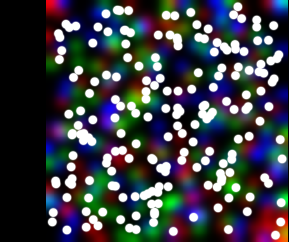